<a href="https://colab.research.google.com/github/314sirius/linked-in/blob/main/MyPosts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
#import emoji

from wordcloud import WordCloud,STOPWORDS

In [ ]:
from google.colab import files

In [ ]:
# Upload your Shares.csv file here
uploaded=files.upload()

Saving Shares.csv to Shares.csv


In [ ]:
df = pd.read_csv('Shares.csv', encoding = 'utf-8')
df

,Date,ShareLink,ShareCommentary,SharedUrl,MediaUrl,Visibility
0,2025-12-25 10:15:37,https://www.linkedin.com/feed/update/urn%3Ali%...,"Last week I had 2 job interviews, interestingl...",NaN,NaN,MEMBER_NETWORK
1,2025-12-21 14:44:27,https://www.linkedin.com/feed/update/urn%3Ali%...,"Mostly correct, except the bleach part for int...",https://youtube.com/watch?v=t9-te-7FLok&si=SsR...,NaN,MEMBER_NETWORK
2,2025-12-18 11:13:18,https://www.linkedin.com/feed/update/urn%3Ali%...,"No wonder, after blocking my gremlins' collect...",NaN,NaN,MEMBER_NETWORK
3,2025-12-17 13:07:15,https://www.linkedin.com/feed/update/urn%3Ali%...,"Good to know we did not start the fire.""\n""""\n...",https://youtube.com/watch?v=drDs-Y5DNH8&si=jEg...,NaN,MEMBER_NETWORK
4,2025-12-16 12:56:40,https://www.linkedin.com/feed/update/urn%3Ali%...,"Finally, a professional offer.""\n""""\n""""\n""""\n""...",NaN,NaN,MEMBER_NETWORK
...,...,...,...,...,...,...
261,2024-06-30 15:42:45,https://www.linkedin.com/feed/update/urn%3Ali%...,A year ago I started my marathon with the goal...,NaN,NaN,MEMBER_NETWORK
262,2024-06-27 17:34:07,https://www.linkedin.com/feed/update/urn%3Ali%...,Let's make stellated dodecahedron great again....,NaN,NaN,MEMBER_NETWORK
263,2024-06-23 16:16:31,https://www.linkedin.com/feed/update/urn%3Ali%...,"Making binch watching more 'productive'.""\n""""\...",NaN,NaN,MEMBER_NETWORK
264,2024-06-13 09:58:57,https://www.linkedin.com/feed/update/urn%3Ali%...,"Every little square is a week. Not that much, ...",NaN,NaN,MEMBER_NETWORK


In [ ]:
!pip install transformers
!pip install tqdm

import pandas as pd
import re
from transformers import pipeline
from tqdm import tqdm

# Assuming df and the 'Message_no_link' column are already defined as in your code

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Function to analyze sentiment with progress bar
def analyze_sentiment_with_progress(messages):
    sentiments = []
    for message in tqdm(messages, desc="Analyzing sentiment"):
      try:
        sentiments.append(sentiment_pipeline(message)[0])
      except Exception as e:
        print(f"Error analyzing: {message}. Error:{e}")
        sentiments.append({'label':'ERROR', 'score':0})
    return sentiments

# Analyze sentiment with progress bar
#df_filtered['Sentiment'] = analyze_sentiment_with_progress(df['Cleaned_Post'].astype(str))
#df_filtered

sentiment_results = analyze_sentiment_with_progress(df['ShareCommentary'].astype(str))

df[['Sentiment_Label', 'Sentiment_Score']] = pd.DataFrame(
    [(result['label'], result['score']) for result in sentiment_results],
    index=df.index
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu
Analyzing sentiment:   2%|▏         | 5/266 [00:00<00:33,  7.78it/s]

Error analyzing: Good to know we did not start the fire."
""
"I love the original song, but this was bardcore epic. "
""
"Lyrics. Enjoy. 👇 "
""
"Eleanor of Aquitaine,"
"Charles the 6th"
"Hath gone insane"
"Reconquista"
"Geoffrey Chaucer, "
"Michelangelo"
""
"Marco Polo, "
"Magna Carta,"
"Christian Schism,"
"Siege of Acre,"
"Byzantine iconoclasm,"
"Guillaume de Machaut"
""
"Charlemagne, "
"Alfred,"
"Anne Boleyn"
"Without a head"
""
"Few things"
"Here to read"
"But the Nibelungenlied"
""
"Castile with"
"Aragon"
"Second pope in Avignon"
""
"Novgorod,"
"Chinggis Khan "
"Beowulf, Decameron"
""
"🔥 We did not start the fire"
"It was always burning as the world was turning"
"We did not start the fire"
"No we did not light it, but we tried to fight it 🔥 "
""
"Henry Tudor, "
"Saladin"
"Richard and the Winter King"
""
"Lindisfarne,"
"Norse raids"
"Children on crusade"
""
"Rome gone, "
"Castillon"
"Mona Lisa, "
"King John"
"Kalmar Union, "
"Hanseatic trade."
""
"Kipchaks"
"Horseback"
"Constantinop

Analyzing sentiment:  48%|████▊     | 128/266 [00:30<00:22,  6.09it/s]

Error analyzing: The source of identity and happiness should be intrinsic."
""
"Let me explain how I made this conclusion."
""
""
"Last year I was completely gutted and lost the foundation of my life, my identity was solely based on the ability to form the emotional connection with one person, and though we haven't communicated for years it was always a warm feeling inside, that I'm capable to build selfless friendship with another human. "
""
"Like Malachi Constant from 'The Sirens of Titans', I always said to myself: at least I have a friend."
""
"When he died I lost the foundation of my identity, was completely destroyed. Desperately needed to fill the void, and decided that 'all you need is love'. After falling in love and being rejected I reached the bottom of despair, wanted to end everything. "
""
"To overcome this crisis I started to draw portraits, exercise (my biceps are impressive now), study math and programming again."
""
""
"Ask yourself how do you identify:"
""
"by the a

Analyzing sentiment:  83%|████████▎ | 220/266 [00:58<00:08,  5.26it/s]

Error analyzing: 11th drawing. "
""
"Viktor Tsoi (21.06.1962-15.08.1990) was a Soviet singer-songwriter of a rock band Kino."
""
"☀️ Звезда по имени Солнце ☀️ "
""
"Белый снег, серый лёд"
"На растрескавшейся земле"
"Одеялом лоскутным на ней"
"Город в дорожной петле"
"А над городом плывут облака"
"Закрывая небесный свет"
"А над городом жёлтый дым"
"Городу две тысячи лет"
"Прожитых под светом"
"Звезды по имени Солнце"
""
"✨  ✨  ✨ "
""
"И две тысячи лет война"
"Война без особых причин"
"Война дело молодых"
"Лекарство против морщин"
"Красная-красная кровь"
"Через час уже просто земля"
"Через два — на ней цветы и трава"
"Через три — она снова жива"
"И согрета лучами"
"Звезды по имени Солнце"
""
"✨  ✨  ✨ "
""
"И мы знаем, что так было всегда"
"Что судьбою больше любим"
"Кто живёт по законам другим"
"И кому умирать молодым"
"Он не помнит слово «да» и слово «нет»"
"Он не помнит ни чинов, ни имён"
"И способен дотянуться до звёзд"
"Не считая, что это сон"
"И упасть опалённым"
"Звездой по имени С

Analyzing sentiment: 100%|██████████| 266/266 [01:09<00:00,  3.82it/s]


In [ ]:
df

,Date,ShareLink,ShareCommentary,SharedUrl,MediaUrl,Visibility,Sentiment_Label,Sentiment_Score
0,2025-12-25 10:15:37,https://www.linkedin.com/feed/update/urn%3Ali%...,"Last week I had 2 job interviews, interestingl...",NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.971887
1,2025-12-21 14:44:27,https://www.linkedin.com/feed/update/urn%3Ali%...,"Mostly correct, except the bleach part for int...",https://youtube.com/watch?v=t9-te-7FLok&si=SsR...,NaN,MEMBER_NETWORK,NEGATIVE,0.988968
2,2025-12-18 11:13:18,https://www.linkedin.com/feed/update/urn%3Ali%...,"No wonder, after blocking my gremlins' collect...",NaN,NaN,MEMBER_NETWORK,POSITIVE,0.997183
3,2025-12-17 13:07:15,https://www.linkedin.com/feed/update/urn%3Ali%...,"Good to know we did not start the fire.""\n""""\n...",https://youtube.com/watch?v=drDs-Y5DNH8&si=jEg...,NaN,MEMBER_NETWORK,ERROR,0.000000
4,2025-12-16 12:56:40,https://www.linkedin.com/feed/update/urn%3Ali%...,"Finally, a professional offer.""\n""""\n""""\n""""\n""...",NaN,NaN,MEMBER_NETWORK,POSITIVE,0.505405
...,...,...,...,...,...,...,...,...
261,2024-06-30 15:42:45,https://www.linkedin.com/feed/update/urn%3Ali%...,A year ago I started my marathon with the goal...,NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.997725
262,2024-06-27 17:34:07,https://www.linkedin.com/feed/update/urn%3Ali%...,Let's make stellated dodecahedron great again....,NaN,NaN,MEMBER_NETWORK,POSITIVE,0.985848
263,2024-06-23 16:16:31,https://www.linkedin.com/feed/update/urn%3Ali%...,"Making binch watching more 'productive'.""\n""""\...",NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.988818
264,2024-06-13 09:58:57,https://www.linkedin.com/feed/update/urn%3Ali%...,"Every little square is a week. Not that much, ...",NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.999481


In [ ]:
# prompt: create new comumn relative_score if sentiment label is negative than sentiment_score*(-1) else sentiment_score, in one line

df['relative_score'] = df.apply(lambda row: row['Sentiment_Score'] * (-1) if row['Sentiment_Label'] == 'NEGATIVE' else row['Sentiment_Score'], axis=1)


In [ ]:
df

,Date,ShareLink,ShareCommentary,SharedUrl,MediaUrl,Visibility,Sentiment_Label,Sentiment_Score,relative_score,Month-Year,Cleaned_ShareCommentary
0,2025-12-25 10:15:37,https://www.linkedin.com/feed/update/urn%3Ali%...,"Last week I had 2 job interviews, interestingl...",NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.981978,-0.981978,2025-12,last week i had 2 job interviews interestingly...
1,2025-12-21 14:44:27,https://www.linkedin.com/feed/update/urn%3Ali%...,"Mostly correct, except the bleach part for int...",https://youtube.com/watch?v=t9-te-7FLok&si=SsR...,NaN,MEMBER_NETWORK,NEGATIVE,0.994352,-0.994352,2025-12,mostly correct except the bleach part for inti...
2,2025-12-18 11:13:18,https://www.linkedin.com/feed/update/urn%3Ali%...,"No wonder, after blocking my gremlins' collect...",NaN,NaN,MEMBER_NETWORK,POSITIVE,0.996703,0.996703,2025-12,no wonder after blocking my gremlins collectio...
3,2025-12-17 13:07:15,https://www.linkedin.com/feed/update/urn%3Ali%...,"Good to know we did not start the fire.""\n""""\n...",https://youtube.com/watch?v=drDs-Y5DNH8&si=jEg...,NaN,MEMBER_NETWORK,ERROR,0.000000,0.000000,2025-12,good to know we did not start the fire i love ...
4,2025-12-16 12:56:40,https://www.linkedin.com/feed/update/urn%3Ali%...,"Finally, a professional offer.""\n""""\n""""\n""""\n""...",NaN,NaN,MEMBER_NETWORK,POSITIVE,0.717419,0.717419,2025-12,finally a professional offer not just another ...
...,...,...,...,...,...,...,...,...,...,...,...
261,2024-06-30 15:42:45,https://www.linkedin.com/feed/update/urn%3Ali%...,A year ago I started my marathon with the goal...,NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.998322,-0.998322,2024-06,a year ago i started my marathon with the goal...
262,2024-06-27 17:34:07,https://www.linkedin.com/feed/update/urn%3Ali%...,Let's make stellated dodecahedron great again....,NaN,NaN,MEMBER_NETWORK,POSITIVE,0.992537,0.992537,2024-06,lets make stellated dodecahedron great again p...
263,2024-06-23 16:16:31,https://www.linkedin.com/feed/update/urn%3Ali%...,"Making binch watching more 'productive'.""\n""""\...",NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.993733,-0.993733,2024-06,making binch watching more productive havent g...
264,2024-06-13 09:58:57,https://www.linkedin.com/feed/update/urn%3Ali%...,"Every little square is a week. Not that much, ...",NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.999742,-0.999742,2024-06,every little square is a week not that much ri...


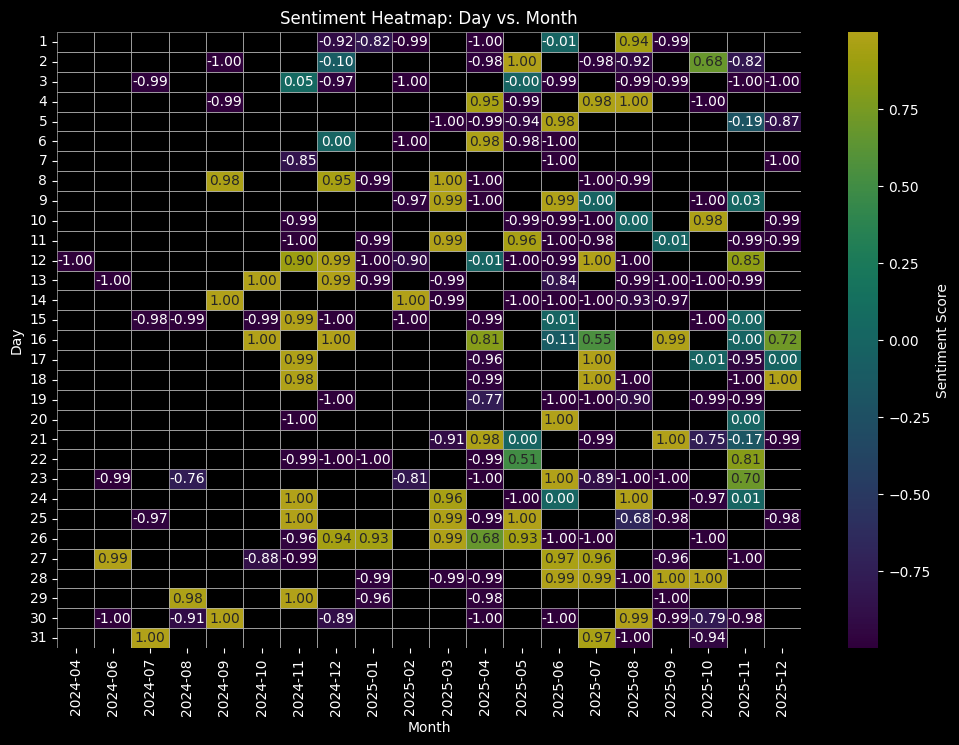

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered is already created as in your previous code

# Convert 'Date' to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])
df['Month-Year'] = df['Date'].dt.to_period('M')

# Create the heatmap
plt.figure(figsize=(12, 8))

# Create a pivot table for the heatmap data using 'Month-Year'
heatmap_data = df.pivot_table(index=df['Date'].dt.day,
                                       columns=df['Month-Year'],
                                       values='relative_score', aggfunc='mean') # Use mean aggregation



# Create custom colormap for positive (green) and negative (red) sentiments
import matplotlib.colors as mcolors


# Use custom colormap to determine colors and intensity based on sentiment scores
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5,
            cbar_kws={'label': 'Sentiment Score'},
            center=0, linecolor='darkgrey', alpha=0.7)

plt.style.use('dark_background')

plt.yticks(rotation=0, ha='right')

plt.title('Sentiment Heatmap: Day vs. Month')
plt.xlabel('Month')
plt.ylabel('Day')
plt.show()

In [ ]:
# prompt: preprocess the text in ShareCommentary to sentiment analysis

def preprocess_text(text):
    """Preprocesses text for sentiment analysis."""
    if not isinstance(text, str):  # Handle non-string inputs
        return ""

    # Lowercasing
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\S+', '', text)

    # Removing mentions (@usernames)
    text = re.sub(r'@\w+', '', text)

    # Removing hashtags (#hashtags) -  Decide if you want to keep or remove
    text = re.sub(r'#\w+', '', text)

    # Removing special characters and punctuation (except for spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Removing extra whitespace
    text = ' '.join(text.split())

    return text


# Apply the preprocessing function to the 'ShareCommentary' column
df['Cleaned_ShareCommentary'] = df['ShareCommentary'].apply(preprocess_text)

# Now use 'Cleaned_ShareCommentary' for sentiment analysis
sentiment_results = analyze_sentiment_with_progress(df['Cleaned_ShareCommentary'].astype(str))

df[['Sentiment_Label', 'Sentiment_Score']] = pd.DataFrame(
    [(result['label'], result['score']) for result in sentiment_results],
    index=df.index
)


Analyzing sentiment:   2%|▏         | 6/266 [00:00<00:23, 11.27it/s]

Error analyzing: good to know we did not start the fire i love the original song but this was bardcore epic lyrics enjoy eleanor of aquitaine charles the 6th hath gone insane reconquista geoffrey chaucer michelangelo marco polo magna carta christian schism siege of acre byzantine iconoclasm guillaume de machaut charlemagne alfred anne boleyn without a head few things here to read but the nibelungenlied castile with aragon second pope in avignon novgorod chinggis khan beowulf decameron we did not start the fire it was always burning as the world was turning we did not start the fire no we did not light it but we tried to fight it henry tudor saladin richard and the winter king lindisfarne norse raids children on crusade rome gone castillon mona lisa king john kalmar union hanseatic trade kipchaks horseback constantinople sacked song of roland silk demand wallachia holy land grunwald manzikert barbarossa golden spurs joan of arc patriarch battle of lepanto we did not start the fire it wa

Analyzing sentiment:  83%|████████▎ | 220/266 [00:49<00:15,  3.06it/s]

Error analyzing: 11th drawing viktor tsoi 2106196215081990 was a soviet singersongwriter of a rock band kino звезда по имени солнце белый снег серый лёд на растрескавшейся земле одеялом лоскутным на ней город в дорожной петле а над городом плывут облака закрывая небесный свет а над городом жёлтый дым городу две тысячи лет прожитых под светом звезды по имени солнце и две тысячи лет война война без особых причин война дело молодых лекарство против морщин краснаякрасная кровь через час уже просто земля через два на ней цветы и трава через три она снова жива и согрета лучами звезды по имени солнце и мы знаем что так было всегда что судьбою больше любим кто живёт по законам другим и кому умирать молодым он не помнит слово да и слово нет он не помнит ни чинов ни имён и способен дотянуться до звёзд не считая что это сон и упасть опалённым звездой по имени солнце. Error:The size of tensor a (635) must match the size of tensor b (512) at non-singleton dimension 1


Analyzing sentiment: 100%|██████████| 266/266 [01:14<00:00,  3.56it/s]


In [ ]:
df['Length'] = df['Cleaned_ShareCommentary'].str.len().fillna(0).astype(int)

In [ ]:
# Convert 'Date' column to datetime, dropping rows with invalid dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])


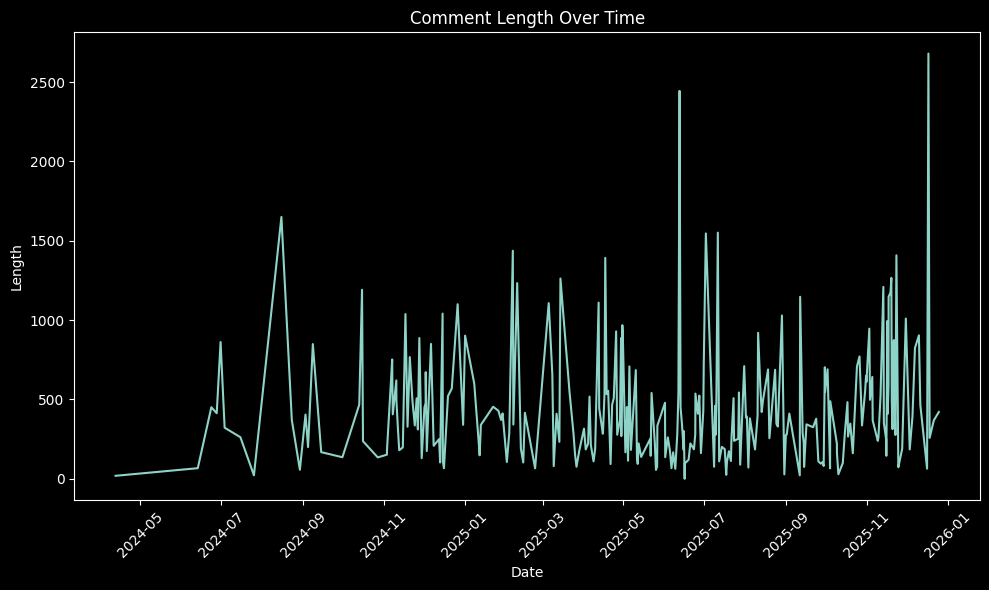

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df['Date'], df['Length'])
plt.xlabel('Date')
plt.ylabel('Length')
plt.title('Comment Length Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
#calculate daily comment count
monthly_post_count = df.groupby(pd.Grouper(key='Date', freq='m'))['Cleaned_ShareCommentary'].count()

# Print the result
monthly_post_count

/tmp/ipython-input-250857448.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_post_count = df.groupby(pd.Grouper(key='Date', freq='m'))['Cleaned_ShareCommentary'].count()


,Cleaned_ShareCommentary
Date,
2024-04-30,1
2024-05-31,0
2024-06-30,4
2024-07-31,4
2024-08-31,4
2024-09-30,5
2024-10-31,4
2024-11-30,19
2024-12-31,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     266 non-null    datetime64[ns]
 1   ShareLink                266 non-null    object        
 2   ShareCommentary          265 non-null    object        
 3   SharedUrl                23 non-null     object        
 4   MediaUrl                 0 non-null      float64       
 5   Visibility               266 non-null    object        
 6   Sentiment_Label          266 non-null    object        
 7   Sentiment_Score          266 non-null    float64       
 8   relative_score           266 non-null    float64       
 9   Month-Year               266 non-null    period[M]     
 10  Cleaned_ShareCommentary  266 non-null    object        
 11  Length                   266 non-null    int64         
dtypes: datetime64[ns](1), float64(3), in

In [ ]:
pip install emoji

In [ ]:
# count emoji in comments
import emoji

def count_emoji(text):
  #text=str(text)
  emoji_count = 0
  for char in text:
    if emoji.is_emoji(char):
      emoji_count += 1
  return emoji_count


df['ShareCommentary'] = df['ShareCommentary'].astype(str)

df['emoji_number'] = df['ShareCommentary'].apply(count_emoji)

df

,Date,ShareLink,ShareCommentary,SharedUrl,MediaUrl,Visibility,Sentiment_Label,Sentiment_Score,relative_score,Month-Year,Cleaned_ShareCommentary,Length,emoji_number
0,2025-12-25 10:15:37,https://www.linkedin.com/feed/update/urn%3Ali%...,"Last week I had 2 job interviews, interestingl...",NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.981978,-0.981978,2025-12,last week i had 2 job interviews interestingly...,421,1
1,2025-12-21 14:44:27,https://www.linkedin.com/feed/update/urn%3Ali%...,"Mostly correct, except the bleach part for int...",https://youtube.com/watch?v=t9-te-7FLok&si=SsR...,NaN,MEMBER_NETWORK,NEGATIVE,0.994352,-0.994352,2025-12,mostly correct except the bleach part for inti...,368,0
2,2025-12-18 11:13:18,https://www.linkedin.com/feed/update/urn%3Ali%...,"No wonder, after blocking my gremlins' collect...",NaN,NaN,MEMBER_NETWORK,POSITIVE,0.996703,0.996703,2025-12,no wonder after blocking my gremlins collectio...,258,1
3,2025-12-17 13:07:15,https://www.linkedin.com/feed/update/urn%3Ali%...,"Good to know we did not start the fire.""\n""""\n...",https://youtube.com/watch?v=drDs-Y5DNH8&si=jEg...,NaN,MEMBER_NETWORK,ERROR,0.000000,0.000000,2025-12,good to know we did not start the fire i love ...,2679,11
4,2025-12-16 12:56:40,https://www.linkedin.com/feed/update/urn%3Ali%...,"Finally, a professional offer.""\n""""\n""""\n""""\n""...",NaN,NaN,MEMBER_NETWORK,POSITIVE,0.717419,0.717419,2025-12,finally a professional offer not just another ...,64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2024-06-30 15:42:45,https://www.linkedin.com/feed/update/urn%3Ali%...,A year ago I started my marathon with the goal...,NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.998322,-0.998322,2024-06,a year ago i started my marathon with the goal...,862,14
262,2024-06-27 17:34:07,https://www.linkedin.com/feed/update/urn%3Ali%...,Let's make stellated dodecahedron great again....,NaN,NaN,MEMBER_NETWORK,POSITIVE,0.992537,0.992537,2024-06,lets make stellated dodecahedron great again p...,413,0
263,2024-06-23 16:16:31,https://www.linkedin.com/feed/update/urn%3Ali%...,"Making binch watching more 'productive'.""\n""""\...",NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.993733,-0.993733,2024-06,making binch watching more productive havent g...,451,10
264,2024-06-13 09:58:57,https://www.linkedin.com/feed/update/urn%3Ali%...,"Every little square is a week. Not that much, ...",NaN,NaN,MEMBER_NETWORK,NEGATIVE,0.999742,-0.999742,2024-06,every little square is a week not that much ri...,67,0


In [ ]:
total_length_posts=df['Length'].sum()
total_length_posts

np.int64(118070)